In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.shape

(1459, 80)

In [6]:
df.shape

(1460, 81)

In [7]:
df_test.shape

(1459, 80)

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

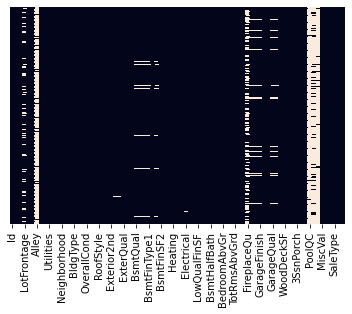

In [9]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Filling the missing value we need to see the test and train data simultaneously   
We will be replacing the null values with mode for categorical values and mean for continous values.  
We will delete columns with more than 50% null values

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

We see MSZoning is having missing values in test data but not in train data. We need to handle it

In [12]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [13]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0]) # replacing with mode

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) # replacing with mean for train
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean()) # replacing with mean for train


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
df.drop(['Alley'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train
df_test.drop(['Alley'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for test

utilities has missing values in test set

In [17]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0]) # replacing with mode

In [19]:
df_test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [20]:

df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0]) # replacing with mode

In [21]:

df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0]) # replacing with mode

In [22]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0]) # replacing with mode
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0]) # replacing with mode

In [24]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean()) # replacing with mean for train
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean()) # replacing with mean for train

In [25]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0]) # replacing with mode
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0]) # replacing with mode
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0]) # replacing with mode
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0]) # replacing with mode
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0]) # replacing with mode
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0]) # replacing with mode


df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean()) # replacing with mean for test
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean()) # replacing with mean for test
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean()) # replacing with mean for test
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean()) # replacing with mean for test
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean()) # replacing with mean for test
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean()) # replacing with mean for test


df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0]) # replacing with mode
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0]) # replacing with mode
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0]) # replacing with mode
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0]) # replacing with mode

df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0]) # replacing with mode
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0]) # replacing with mode
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0]) # replacing with mode


In [26]:
df.drop(['PoolQC'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train
df_test.drop(['PoolQC'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for test
df.drop(['Fence'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train
df_test.drop(['Fence'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for test
df.drop(['MiscFeature'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train
df_test.drop(['MiscFeature'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for test
df.drop(['FireplaceQu'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train
df_test.drop(['FireplaceQu'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for test


In [27]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0]) # replacing with mode
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0]) # replacing with mode

In [28]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0]) # replacing with mode
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0]) # replacing with mode
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]) # replacing with mode
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0]) # replacing with mode
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) # replacing with mode
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0]) # replacing with mode

In [29]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [30]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0]) # replacing with mode
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0]) # replacing with mode

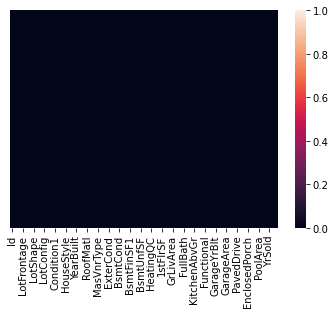

In [31]:
sns.heatmap(df_test.isnull(),yticklabels = False, cbar = True)


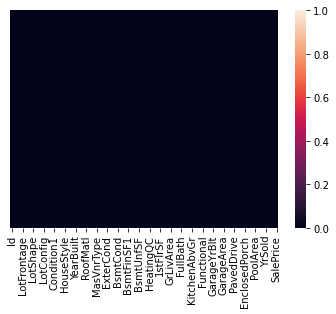

In [32]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = True)

In [33]:
df.shape

(1460, 76)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(1459, 76)

In [37]:
df_test.shape


(1459, 75)

In [38]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
        'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [39]:
len(columns)


38

In [40]:

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [41]:

main_df=df.copy()

In [42]:
final_df=pd.concat([df,df_test],axis=0)

In [43]:
final_df.shape

(2918, 76)

In [44]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [45]:
final_df.shape

(2918, 234)

In [46]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [47]:
final_df.shape

(2918, 178)

In [48]:

df_Train=final_df.iloc[:1459,:]
df_Test=final_df.iloc[1459:,:]

In [49]:
df_Test.shape

(1459, 178)

In [50]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [52]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0


In [53]:
X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

In [54]:

import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
import pickle
filename = "finalazied_model.plk"
pickle.dump(classifier,open(filename,'wb'))

In [57]:
df_Test['GarageYrBlt'] = pd.to_numeric(df_Test['GarageYrBlt'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_Test['GarageYrBlt'][1]


1958.0

In [59]:
y_predict = classifier.predict(df_Test)

In [60]:
y_predict

array([126564.48, 150072.28, 186359.94, ..., 194201.23, 103751.97,
       230613.06], dtype=float32)

In [61]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_predict)
sub_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('./sub1.csv',index=False)

 got RMSE score of 0.14065 

In [65]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


In [66]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [67]:

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [68]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_predict1 = regressor.predict(df_Test)

In [74]:
y_predict1

array([125581.42, 162919.4 , 188219.47, ..., 175510.75, 120531.73,
       238281.58], dtype=float32)

In [75]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_predict1)
sub_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('./sub2.csv',index=False)

In [ ]:
0.14036

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_